# Discrete Distributions

We are going to measure discrete events (e.g. True/False, A/B/C, Dog/Cat/Bird, etc) using discrete distributions. Discrete events are categorical events that are countable natural numbers or integers, and not floating point values. 

Let's start with the arguably simplest discrete distribution, and use it to introduce distributions in general.

## Bernoulli Distribution

Let's say I am trying to manufacture a swimming MP3 player. But for it to work, it obviously has to be waterproof. My engineer claims the current prototype should work 90% of the time. When I ask her to clarify, she says each unit built has a 90% chance of working correctly and keeping the water out. 

img

If you were asked to show this as a simple bar chart, the percentage of working versus non-working swimming MP3 players, we would use a **Bernoulli Distribution**. This would include two bars, with x-values $ 0 $ and $ 1 $ for working and non-working outcomes, with y-values $ .1 $ and $ .9 $ respectively. 

Below, we use a `bernoulli` distribution's `pmf` function to show the False (0) and True (1) probabilities respectively. PMF stands for "probability mass function," which outputs the probability for each event outcome. 

In [6]:
from scipy.stats import bernoulli
import numpy as np 

# Set the probability of success (think "1" or a "heads" in a coin fliip) 
p = 0.9

# Create a Bernoulli distribution object
bd = bernoulli(p)

# Generate x-values 
x = np.array([0, 1])

# Calculate the probability mass function (PMF)
pmf = bd.pmf(x)
print(pmf) # [0.1 0.9]

[0.1 0.9]


It should be unsurprising that both outcomes (*0* or *1*, *True* or *False*, *working* or *not working*) add up to  $ 1.0 $. This is what makes a **probability distribution**, where all outcomes add up to 1.0. 

To visualize this, let's put it in a bar graph. 

[0.1 0.9]


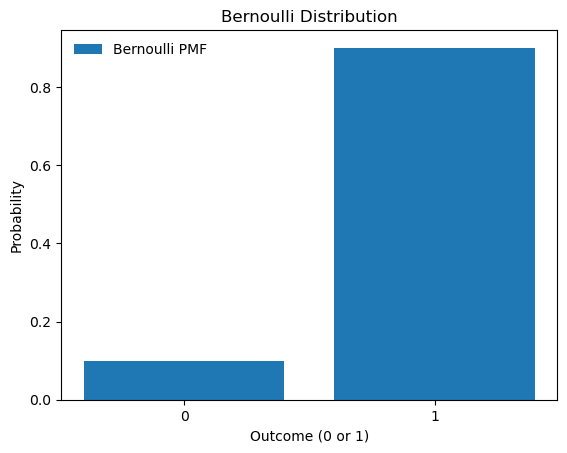

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Set the probability of success (think "1" or a "heads" in a coin fliip) 
p = 0.9

# Create a Bernoulli distribution object
bd = bernoulli(p)

# Generate x-values for the plot
x = np.array([0, 1])

# Calculate the probability mass function (PMF)
pmf = bd.pmf(x)
print(pmf) # [0.1 0.9]

# Plot the PMF
plt.bar(x, pmf,  label='Bernoulli PMF')

# Set the tick marks on the x axis
plt.xticks([0, 1])

# Set the title and labels
plt.title('Bernoulli Distribution')
plt.xlabel('Outcome (0 or 1)')
plt.ylabel('Probability')

# Show the plot
plt.legend(loc='best', frameon=False)
plt.show()

The Bernoulli distribution is hopefully straightforward. It just shows the probabilities of the event occurring and not occurring as a bar chart. 

## Binomial Distribution 

img

Next up, let's talk about the **binomial distribution** which measures out of *n* trials, what is the probability for seeing *k* successes/events given *p* probability? Let's say we want to know how likely it is with a 90% success rate, we would see 8 working swimming mp3 players out of 10. We can achieve this using the binomial. Below, we declare a binomial distribution in SciPy and specify the `k`, `n` and `x` value the last which will be 8 through the `pmf()` function. 

In [12]:
from scipy.stats import binom

# Set the number of trials and probability of success
n = 10
p = 0.9

# Calculate the probability mass function (PMF)
y = binom.pmf(8, n, p)

print("What is the probability of 8 working devices out of 10?")
print(y) # 0.1937102445

What is the probability of 8 working devices out of 10?
0.1937102444999998


So there is a 19.37% probability we would see 8 working devices out of 10 devices total. How about we look at all possible outcomes in bar chart? Where we see for 10 trials, what is the probability of $ k $ working devices from 0 through 10? 

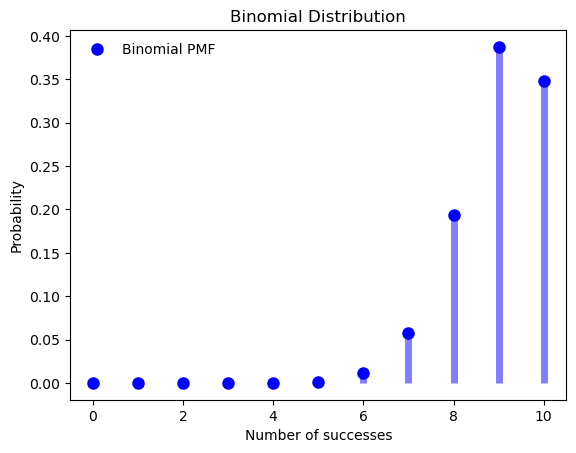

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Set the number of trials and probability of success
n = 10
p = 0.9

# Generate x-values for the plot
x = np.arange(0, n + 1)

# Calculate the probability mass function (PMF)
pmf = binom.pmf(x, n, p)

# Plot the PMF
plt.plot(x, pmf, 'bo', ms=8, label='Binomial PMF')
plt.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)

# Set the title and labels
plt.title('Binomial Distribution')
plt.xlabel('Number of successes')
plt.ylabel('Probability')

# Show the plot
plt.legend(loc='best', frameon=False)
plt.show()


We can observe here that the probabilities of all the outcomes add up to 1.0, but most of it is on the right from k = 6 through 10. The probabilies of getting 5 successful devices or less are very unlikely, as they are hugging 0. We can use this to reasonably assess how realistic the underlying success rate $ p $ is given an outcome of $ 10 $ trials yielding $ 8 $ success, $ 7 $ successes, and so on. 

If the industrial engineer claims the prototype has a 90% success rate, and you run 10 trials and get 8 successes, that necessarily does not mean the engineer was wrong. There is always a margin of give or take, just like a fair coin can have 4/10 heads or 6/10 heads, but the question is how likely is that outcome given that success rate? 

## Multinomial Distribution

The **multinomial distribution** is just like the binomial distribution, but it allows more categories than just binary outcomes like True/False or Success/Failure. 

Let's say a pilot group tested the swimming MP3 player, and they were given a brief survey. Based on their experience, they can reply to the question "How was your experience with the swimming MP3 player?" and they can answer *Good*, *Okay*, and *Poor*. 

From our research we believe 60% of users will reply *Good*, 30% will reply *Okay*, and 10% will reply *Poor*. 

$ P(\text{Great}) = .6 $ 

$ P(\text{Okay}) = .3 $

$ P(\text{Poor}) = .1 $ 

How can we generalize this information in a way we can predict how likely of each category we will see in $ n $ trials? This is where the multinomial distribution will come in. Below using SciPy, we create a multinomial distribution with 10 trials, or $ n = 10 $. We also pass those three 3 probabilities for those three events. 

In the same order as the provided probabilities, we can call the `pmf()` function to look up the probability of getting those event-specific outcomes out of 10 trials. It is very important those numbers add up to 10, as we set $ n = 10 $. 

In [18]:
from scipy.stats import multinomial

md = multinomial(n=10,p=[.6, .3, .1])

print("What is the probability of 6 good, 3 okay, and 1 poor?")
print(md.pmf([6,3,1]))

print("\nWhat is the probability of 7 good, 2 okay, and 1 poor?")
print(md.pmf([7,2,1]))

print("\nWhat is the probability of 7 good, 1 okay, and 2 poor?")
print(md.pmf([7,1,2]))

What is the probability of 6 good, 3 okay, and 1 poor?
0.10581580799999993

What is the probability of 7 good, 2 okay, and 1 poor?
0.09069926400000006

What is the probability of 7 good, 1 okay, and 2 poor?
0.03023308800000009


Somewhat expectedly, outcomes that are closer to the .6, .3, and .1 probabilities are more likely. The further you venture away from those proportions the less likely they become. 

In [30]:
from scipy.stats import binom

# Set the number of trials and probability of success
n = 8
p = 0.5

# Calculate the probability mass function (PMF)
y = binom.pmf(7, 8, 0.5)

print("What is the probability of 7 heads in 8 coin flips?")
print(y) 

What is the probability of 7 heads in 8 coin flips?
0.031249999999999983


## Poisson Distribution

A **poisson distribution** is a discrete distribution that measures the probability of how many times * k * an event is likely to occur for a given period of time. The parameter $ \lambda $ is the average number of events that will occur in that period. 

Let's say I want to predict the time between each view on a given YouTube video. Of course, trends on a video can change in a given moment (e.g. a celebrity shares the video on Twitter or YouTube changes its algorithm), but let's say currently the video gets an average of 5 views every minute. That would make `5` my lambda parameter. If I want to measure how likely each view count (between 0 and 10) is within a minute, I can use a Poisson distribution to do this. 

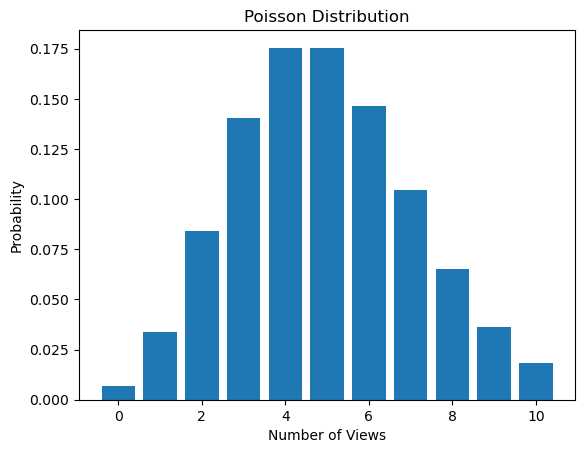

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Set the Poisson parameter lambda
lambda_p = 5

# Create a numpy array for the x-axis
x = np.arange(0, 11, 1)

# Calculate the Poisson probability mass function (PMF) values for the given lambda and x values
y = poisson.pmf(x, mu=lambda_p)

# Create a bar chart of the PMF values
plt.bar(x, y, align='center')

# Set the title and labels
plt.title('Poisson Distribution')
plt.xlabel('Number of Views')
plt.ylabel('Probability')

# Show the plot
plt.show()

Looking above, we can see that all the outcomes add up to 1, making it a probability distribution once again. There is a stronger probability of getting a view count close to 5 as that is where most probability mass gravitates, and less likely around 0 and 10 views. 

## Exercise 

You suspect your friend is not using a fair coin in a football game. You took the coin and flipped it 8 times, and it came up heads 7 times. What is the probability a fair coin with .5 probability for heads would yield 7 heads out of 8 coin flips? 

Complete the code below (replacing the question marks "?") to get the answer. 

### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

As shown in the code below, there is a $ .03 $ probability of getting 7 heads in 8 coin flips, if the coin is fair. Therefore we can be very suspicious that this coin is unfair, given how unlikely that is. If we gave it more coin flips we can use this to drive the probability down even further.  

In [38]:
from scipy.stats import binom

# Set the number of trials and probability of success
n = 8
p = 0.5

# Calculate the probability mass function (PMF)
y = binom.pmf(7, n, p)

print("What is the probability of 7 heads in 8 coin flips?")
print(y) # 0.031249999999999976

What is the probability of 7 heads in 8 coin flips?
0.031249999999999983
